In [3]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [36]:
import numpy as np 
#from keras.models import Sequential 
#from keras.layers import LSTM, Dense, Dropout 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import xarray as xr 
 

In [37]:
Pre =  xr.open_mfdataset("pre/*.nc", combine='by_coords') #,chunks=None) #{'time': 10}) 

ValueError: unrecognized chunk manager dask - must be one of: []

In [4]:
Pre_df=Pre.pre.sel(lon=slice(-19, 10), lat =slice(12, 17)).mean(dim=['lon',"lat"]).to_dataframe()

<Axes: xlabel='time'>

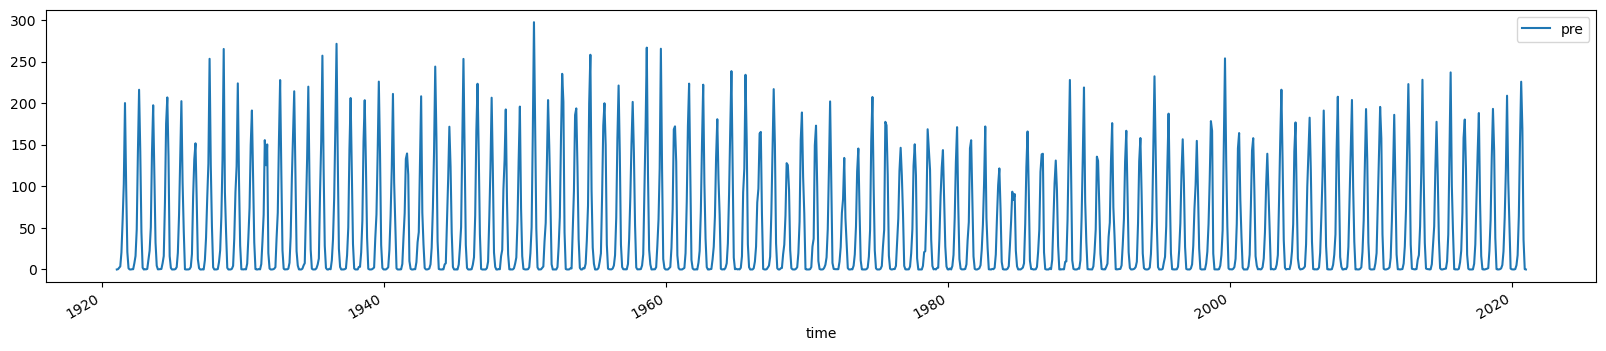

In [5]:
Pre_df.plot(figsize=(20, 4))# plot pre sahel

In [6]:

Pre_df

,pre
time,
1921-01-16,0.012362
1921-02-15,0.347970
1921-03-16,1.900923
1921-04-16,3.700922
1921-05-16,20.561069
...,...
2020-08-16,225.880630
2020-09-16,169.148148
2020-10-16,35.830070


Text(0, 0.5, 'Rainfall')

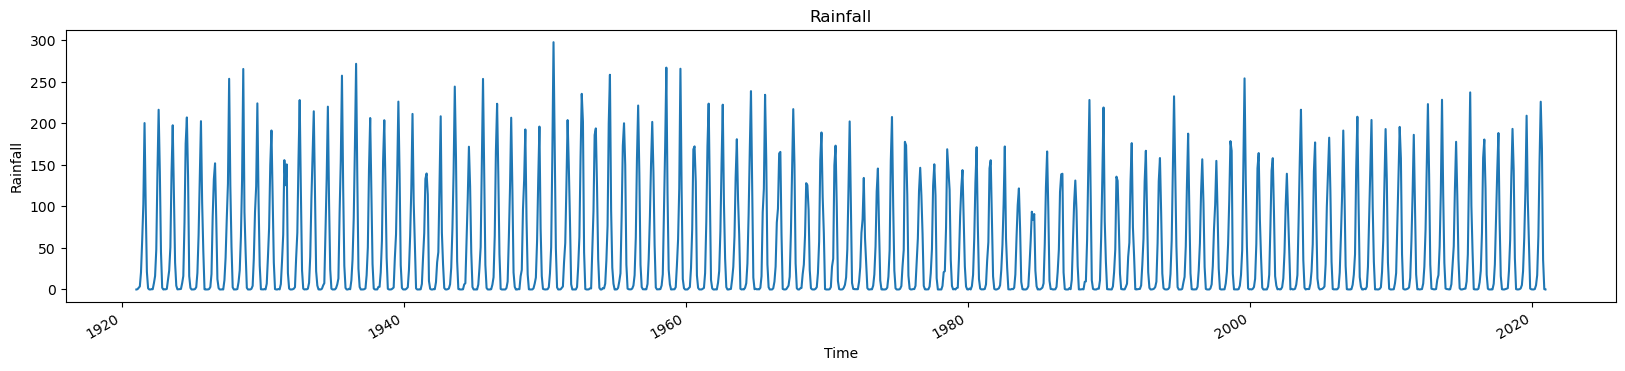

In [7]:
Pre_df.pre.plot(kind='line', figsize=(20,4))
plt.title("Rainfall")
plt.xlabel("Time")
plt.ylabel("Rainfall")

In [8]:
Pre_df

,pre
time,
1921-01-16,0.012362
1921-02-15,0.347970
1921-03-16,1.900923
1921-04-16,3.700922
1921-05-16,20.561069
...,...
2020-08-16,225.880630
2020-09-16,169.148148
2020-10-16,35.830070


In [9]:
train_dates=pd.to_datetime(Pre_df.pre)

In [10]:
train_dates

time
1921-01-16   1970-01-01 00:00:00.000000000
1921-02-15   1970-01-01 00:00:00.000000000
1921-03-16   1970-01-01 00:00:00.000000001
1921-04-16   1970-01-01 00:00:00.000000003
1921-05-16   1970-01-01 00:00:00.000000020
                          ...             
2020-08-16   1970-01-01 00:00:00.000000225
2020-09-16   1970-01-01 00:00:00.000000169
2020-10-16   1970-01-01 00:00:00.000000035
2020-11-16   1970-01-01 00:00:00.000000000
2020-12-16   1970-01-01 00:00:00.000000000
Name: pre, Length: 1200, dtype: datetime64[ns]

In [11]:
training_df=Pre_df[['pre']].astype(float)

In [12]:
#training_df.plot.line()

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
scaler=scaler.fit(training_df)
training_df_scaled=scaler.transform(training_df)

In [15]:
trainX=[]
trainY=[]
n_past=20# considerate value to considerate next values 
n_fut=100# for predicting the next 100 values based on previous 20 values 

#Adding the values for trainX and trainY
for i in range(n_past, len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

trainX,trainY=np.array(trainX),np.array(trainY)
print('trainX shape =={}'.format(trainX.shape))
print('trainY shape =={}'.format(trainY.shape))


trainX shape ==(1081, 20, 1)
trainY shape ==(1081, 1)


In [16]:
trainX

array([[[-0.72921652],
        [-0.72409305],
        [-0.70038535],
        ...,
        [ 0.00338419],
        [ 1.40442274],
        [ 2.57121481]],

       [[-0.72409305],
        [-0.70038535],
        [-0.67290617],
        ...,
        [ 1.40442274],
        [ 2.57121481],
        [ 1.43435231]],

       [[-0.70038535],
        [-0.67290617],
        [-0.41551559],
        ...,
        [ 2.57121481],
        [ 1.43435231],
        [-0.04591833]],

       ...,

       [[-0.71551355],
        [-0.72888134],
        [-0.72901091],
        ...,
        [-0.62071374],
        [-0.30918443],
        [ 0.36934799]],

       [[-0.72888134],
        [-0.72901091],
        [-0.72258051],
        ...,
        [-0.30918443],
        [ 0.36934799],
        [ 1.50765254]],

       [[-0.72901091],
        [-0.72258051],
        [-0.71322643],
        ...,
        [ 0.36934799],
        [ 1.50765254],
        [ 2.67503069]]])

In [17]:
model=Sequential()
model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu',return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

/home/teacher/control/miniconda3/envs/climlab_model/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 32)         │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,025 (82.13 KB)

 Trainable params: 21,025 (82.13 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(trainX, trainY, epochs=30, batch_size=5, validation_split=0.2,verbose=1)

Epoch 1/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 1.0075 - val_loss: 0.9897
Epoch 2/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9599 - val_loss: 0.5464
Epoch 3/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6249 - val_loss: 0.2549
Epoch 4/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.4233 - val_loss: 0.1293
Epoch 5/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3545 - val_loss: 0.0972
Epoch 6/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2753 - val_loss: 0.1283
Epoch 7/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2037 - val_loss: 0.1358
Epoch 8/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2283 - val_loss: 0.0735
Epoch 9/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1565 - val_loss: 0.0483
Epoch 10/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2405 - val_loss: 0.0757
Epoch 11/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1584 - val_loss: 0.0387
Epoch 12/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 2s

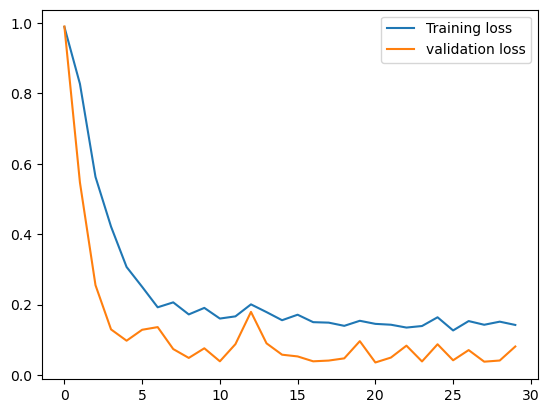

In [19]:
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.legend()

In [20]:
#prediction 
from pandas.tseries.holiday import USFederalHolidayCalendar 
from pandas.tseries.offsets import CustomBusinessDay 
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

n_past=1
n_days_for_prediction=100
predict_period_dates=pd.date_range(list(train_dates)[-n_past], periods=n_days_)
prediction = model.predict

NameError: name 'n_days_' is not defined

In [21]:
import seaborn as sns 
original = Pre_df[['pre']]


sns.set(rc= {'figure.figsize:(15,8)'})
sns.lineplot(original['pre'])
#sns.lineplot

ValueError: too many values to unpack (expected 2)

In [73]:
Pre =  xr.open_mfdataset("chirps_data/*.days_p05.nc", combine='by_coords') #,chunks=None) #{'time': 10}) 

ValueError: unrecognized chunk manager dask - must be one of: []

In [74]:
Pre_1981= xr.open_dataset('chirps_data/chirps-v2.0.1981.days_p05.nc')

In [75]:
Pre

NameError: name 'Pre' is not defined

In [8]:
Pre.precip.mean(dim=["longitude", "latitude"]).plot(figsize=(20, 4))#plot global

NameError: name 'Pre' is not defined

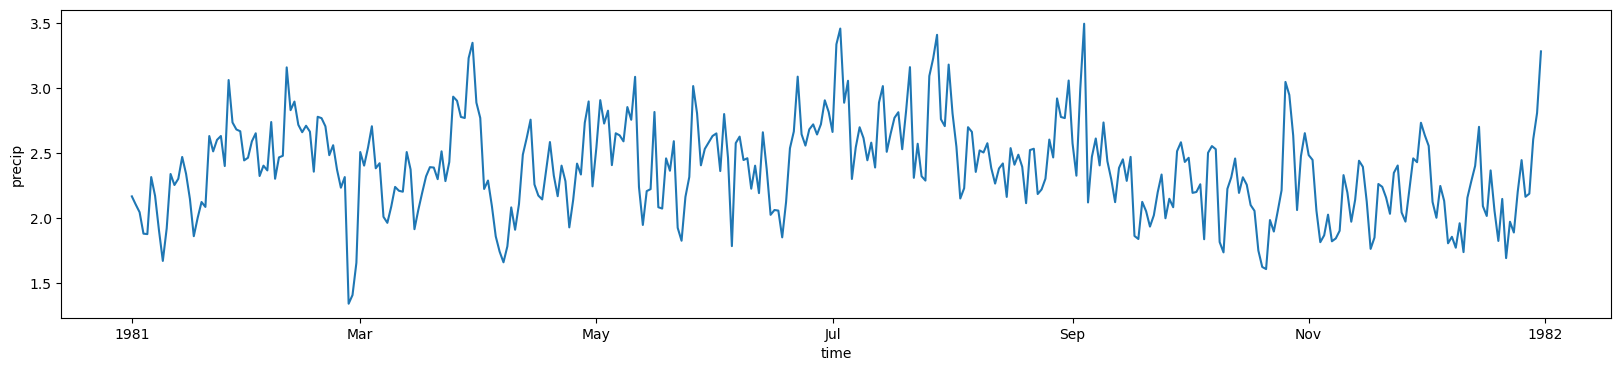

In [76]:
Pre_1981.precip.mean(dim=["longitude", "latitude"]).plot(figsize=(20, 4))#plot global

In [77]:
Pre_1981.precip

<xarray.DataArray 'precip' (time: 365, latitude: 2000, longitude: 7200)> Size: 21GB
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 3kB 1981-01-01 1981-01-02 ... 1981-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

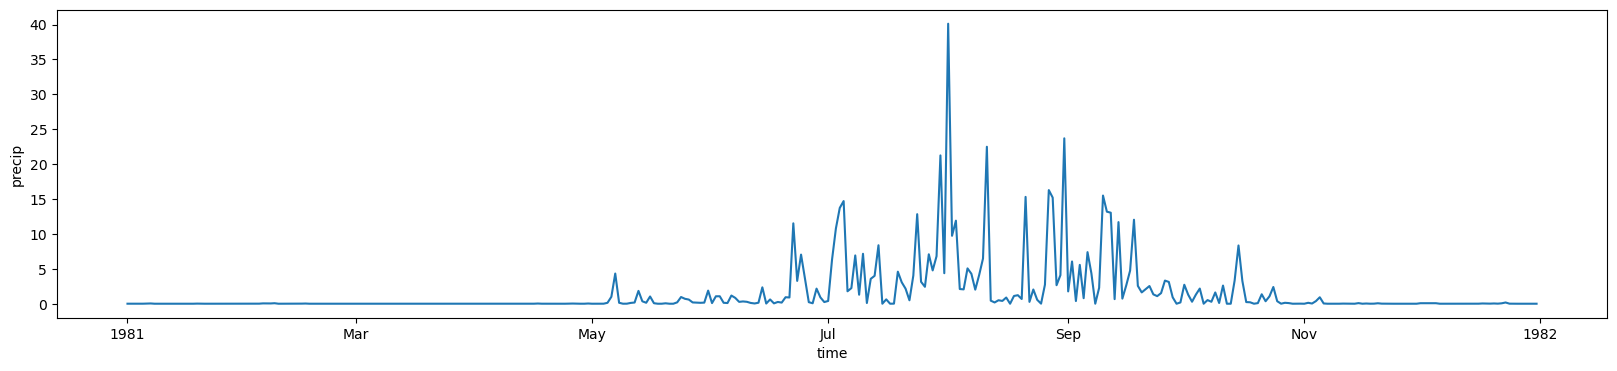

In [78]:
Pre_1981= xr.open_dataset('chirps_data/chirps-v2.0.1981.days_p05.nc')
PreSn=Pre_1981.precip.sel(longitude=slice(-17, -12), latitude =slice(12, 17))
PreSn.mean(dim=["longitude", "latitude"]).plot(figsize=(20, 4))

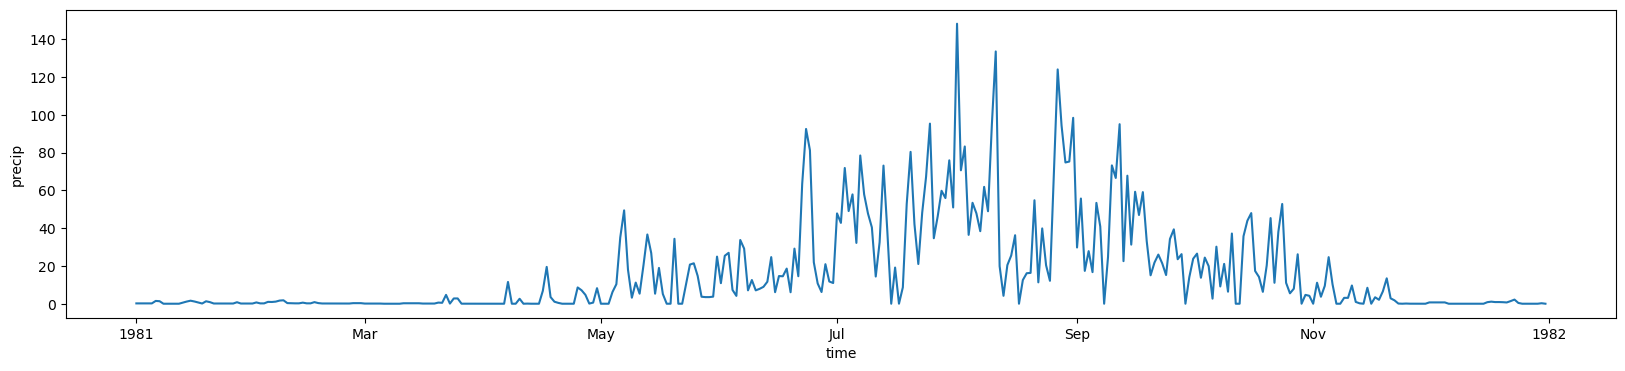

In [79]:
MaxPreJul_Sep=PreSn.max(dim=["longitude", "latitude"]).plot(figsize=(20, 4))
MaxPreJul_Sep

In [80]:
PreSn_df=PreSn.mean(dim=["longitude", "latitude"]).to_dataframe()

In [81]:
MaxPreJul_Sep81_df =PreSn.max(dim=["longitude", "latitude"]).to_dataframe()
MaxPreJul_Sep81_df

,precip
time,
1981-01-01,0.175469
1981-01-02,0.175469
1981-01-03,0.175469
1981-01-04,0.175469
1981-01-05,0.175469
...,...
1981-12-27,0.000000
1981-12-28,0.000000
1981-12-29,0.000000


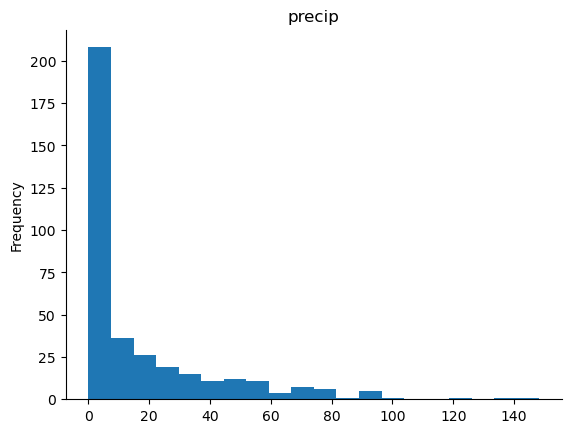

In [82]:
from matplotlib import pyplot as plt
MaxPreJul_Sep81_df['precip'].plot(kind='hist', bins=20, title='precip')
plt.gca().spines[['top', 'right',]].set_visible(False)

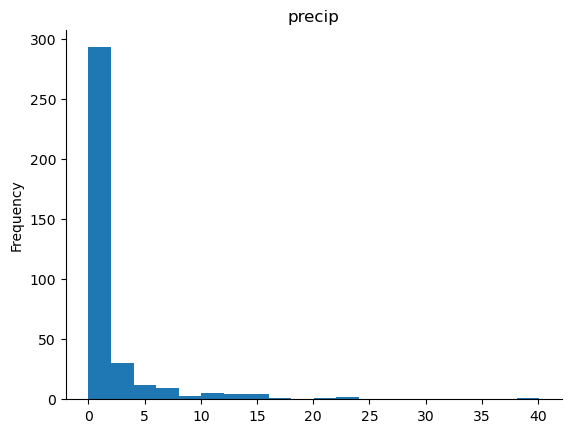

In [83]:
from matplotlib import pyplot as plt
PreSn_df['precip'].plot(kind='hist', bins=20, title='precip')
plt.gca().spines[['top', 'right',]].set_visible(False)

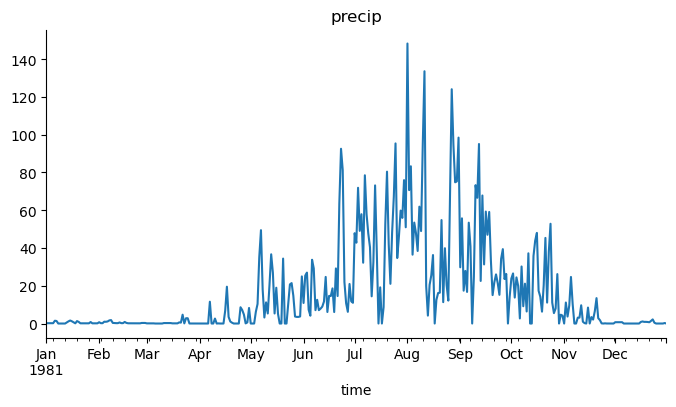

In [84]:
from matplotlib import pyplot as plt
MaxPreJul_Sep81_df['precip'].plot(kind='line', figsize=(8, 4), title='precip')
plt.gca().spines[['top', 'right']].set_visible(False)


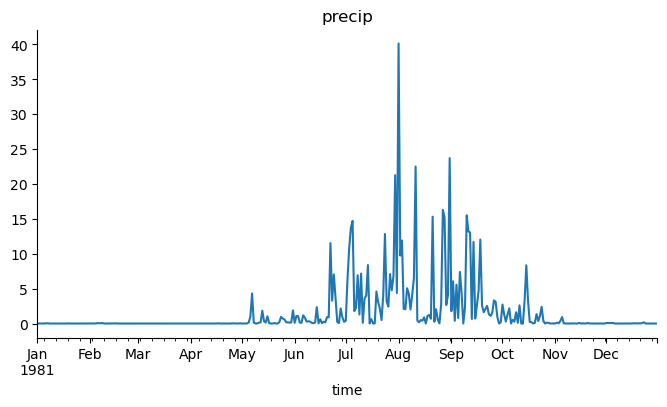

In [85]:
from matplotlib import pyplot as plt
PreSn_df['precip'].plot(kind='line', figsize=(8, 4), title='precip')
plt.gca().spines[['top', 'right']].set_visible(False)


In [86]:
Pre_Jul_Sep=Pre_1981.precip.sel(longitude=slice(-17, -12), latitude =slice(12, 17), time=slice("1981-07", "1981-09")).mean(dim=["longitude", "latitude"]).to_dataframe()
Pre_Jul_Sep

,precip
time,
1981-07-01,0.393806
1981-07-02,6.304141
1981-07-03,10.785560
1981-07-04,13.728194
1981-07-05,14.707671
...,...
1981-09-26,3.316094
1981-09-27,3.120174
1981-09-28,0.915706


In [87]:
Pre_Jul_Sep=Pre_1981.precip.sel(longitude=slice(-17, -12), latitude =slice(12, 17), time=slice("1981-07", "1981-09")).mean(dim=["longitude", "latitude"]).to_dataframe()
Pre_Jul_Sep

,precip
time,
1981-07-01,0.393806
1981-07-02,6.304141
1981-07-03,10.785560
1981-07-04,13.728194
1981-07-05,14.707671
...,...
1981-09-26,3.316094
1981-09-27,3.120174
1981-09-28,0.915706


In [88]:
MaxPreJul_Sep81_df.to_csv('MaxPreJul_Sep81_df.csv', index=True)
MaxPreJul_Sep81_df

,precip
time,
1981-01-01,0.175469
1981-01-02,0.175469
1981-01-03,0.175469
1981-01-04,0.175469
1981-01-05,0.175469
...,...
1981-12-27,0.000000
1981-12-28,0.000000
1981-12-29,0.000000


In [89]:
Pre_Jul_Sep.to_csv('Pre_Jul_Sep.csv', index=True)

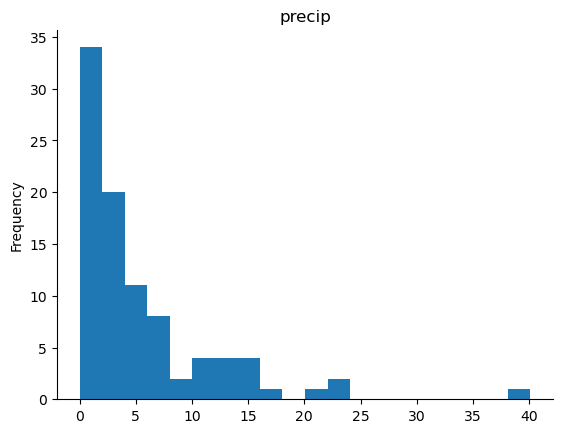

In [90]:
from matplotlib import pyplot as plt
Pre_Jul_Sep['precip'].plot(kind='hist', bins=20, title='precip')
plt.gca().spines[['top', 'right',]].set_visible(False)

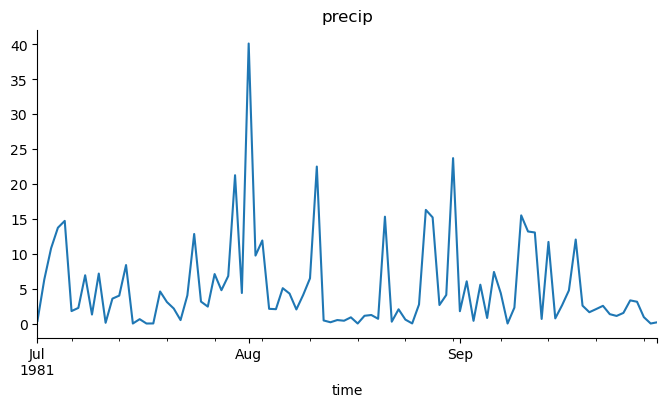

In [91]:
from matplotlib import pyplot as plt
Pre_Jul_Sep['precip'].plot(kind='line', figsize=(8, 4), title='precip')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.savefig('precip1981')

In [92]:
def Extreme_point(Pre_Jul_Sep, n) :
    
        print("Extreme point")
        List_extreme_index=list()
        List_extreme=list()
        L2=list()
        L3=list()
        for i in range(len(Pre_Jul_Sep)):
            if Pre_Jul_Sep.iloc[i,0] > np.percentile(Pre_Jul_Sep, n) :
                List_extreme.append(Pre_Jul_Sep.iloc[i,0])
                List_extreme_index.append(Pre_Jul_Sep.index[i])
                  #L3.append(Pre_Jul_Sep.index[i-1])
                 
                L3.append(Pre_Jul_Sep.iloc[i-3,0])
                L3.append(Pre_Jul_Sep.iloc[i-2,0])
                L3.append(Pre_Jul_Sep.iloc[i-1,0])
                L3.append(Pre_Jul_Sep.iloc[i,0])
                L3.append(Pre_Jul_Sep.iloc[i+1, 0])
                L3.append(Pre_Jul_Sep.iloc[i+2, 0])
                L3.append(Pre_Jul_Sep.iloc[i+3, 0])
                L2.append(Pre_Jul_Sep.index[i-3])
                L2.append(Pre_Jul_Sep.index[i-2])
                L2.append(Pre_Jul_Sep.index[i-1])
                L2.append(Pre_Jul_Sep.index[i])
                L2.append(Pre_Jul_Sep.index[i+1])
                L2.append(Pre_Jul_Sep.index[i+2])
                L2.append(Pre_Jul_Sep.index[i+3])

        d={'Time':L2, 'precip':L3}
        L=pd.DataFrame(data=d)
        return L


In [93]:
df1=Extreme_point(MaxPreJul_Sep81_df,99.99)
df1

Extreme point


,Time,precip
0,1981-07-29,55.966610
1,1981-07-30,75.956444
2,1981-07-31,50.985359
3,1981-08-01,148.314240
4,1981-08-02,70.673805
5,1981-08-03,83.290680
6,1981-08-04,36.475357


In [94]:
df=Extreme_point(Pre_Jul_Sep,99)
df

Extreme point


,Time,precip
0,1981-07-29,6.809879
1,1981-07-30,21.249563
2,1981-07-31,4.371497
3,1981-08-01,40.118397
4,1981-08-02,9.733891
5,1981-08-03,11.899052
6,1981-08-04,2.105938


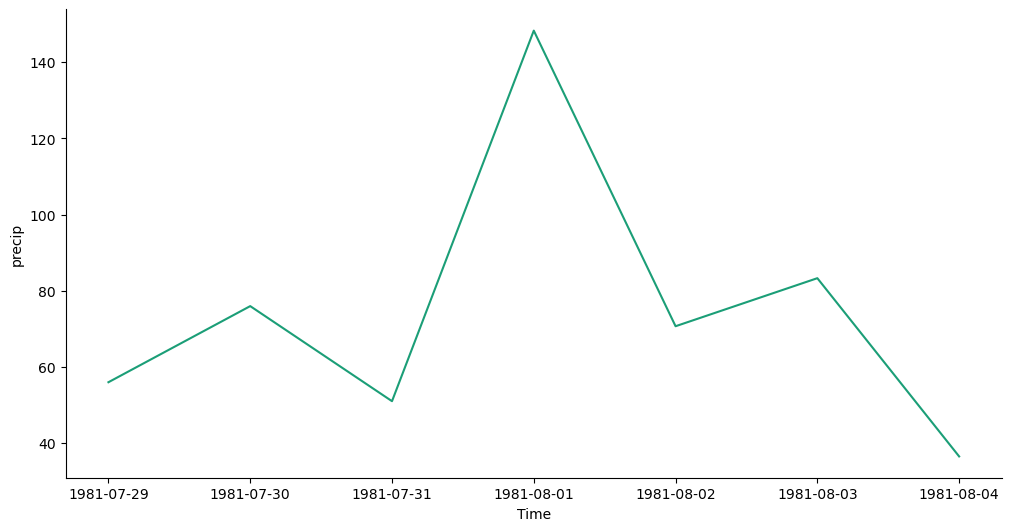

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Time']
    ys = series['precip']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df1.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('precip')

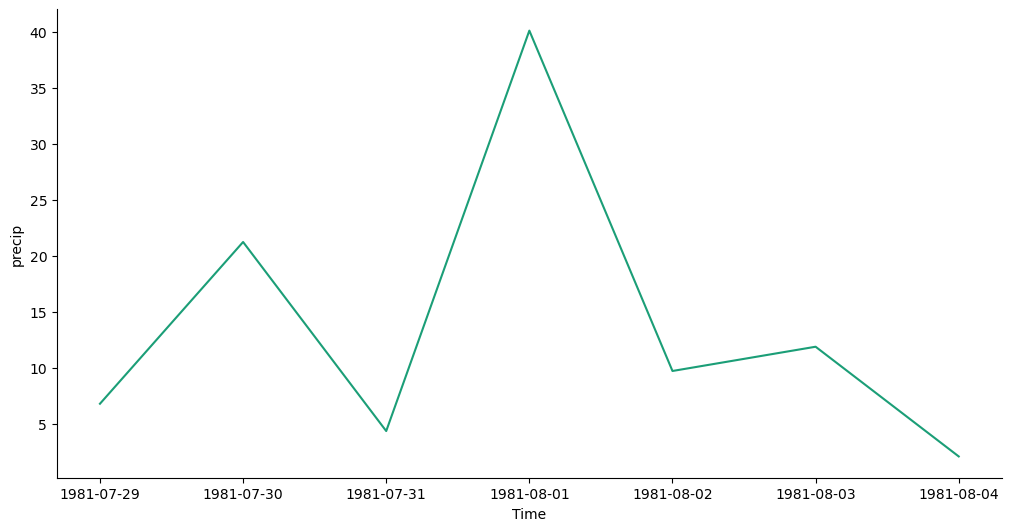

In [96]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Time']
    ys = series['precip']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('precip')

In [97]:
Pre = xr.open_mfdataset("chirps_data/chirps-v2.*.days_p05.nc", combine='by_coords')

ValueError: unrecognized chunk manager dask - must be one of: []

In [ ]:
PreSn_df=Pre.precip.sel(longitude=slice(-17, -12), latitude =slice(12, 17)).mean(dim=["longitude", "latitude"]).to_dataframe()
PreSn_df

In [ ]:
PreSn_df['precip'].plot(kind='line', figsize=(8, 4), title='precip')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_all=Extreme_point(PreSn_df,99)
df_all

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_all.sort_values('Time', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time')
_ = plt.ylabel('precip')

In [ ]:
df_all[df_all.index.day == 1]

In [ ]:
PreSn_df['precip'][PreSn_df['precip'].index.day == 1]

In [ ]:
aout = PreSn_df['precip'][PreSn_df['precip'].index.month==8]
aout

In [ ]:
aout[4]

In [ ]:
PreSn_df['precip'][PreSn_df['precip'].index.year==1988& PreSn_df['precip'].index.month==1989 ]

In [ ]:
#def d'une fonction qui selection seulement les mois de juillet aout septembre 
def select_JAS(PreSn_df):
    L=list()
    M=list()
    N=list()
    
    for i in range(1981,2021):
        #if PreSn_df['precip'][PreSn_df['precip'].index.year==i]:

        L.append(PreSn_df['precip'][PreSn_df['precip'].index.month==7])
        M.append(PreSn_df['precip'][PreSn_df['precip'].index.month==8])
        N.append(PreSn_df['precip'][PreSn_df['precip'].index.month==9])
        

        return L,M,N
        
        
    

In [ ]:
def select_JAS(PreSn_df):
    L=list()
    M=list()
    N=list()
    
    for i in range(len):
        #if PreSn_df['precip'][PreSn_df['precip'].index.year==i]:

        L.append(PreSn_df['precip'][PreSn_df['precip'].index.month==7])
        M.append(PreSn_df['precip'][PreSn_df['precip'].index.month==8])
        N.append(PreSn_df['precip'][PreSn_df['precip'].index.month==9])
        

        return L,M,N
        
        
    

In [ ]:
def Ordorne3month(L, M, N):
    L1=list()
    for i in range(len(L)+len(M)+len(N)):
        
    

In [ ]:
select_JAS(PreSn_df)

In [ ]:
1=1

In [ ]:
import numpy as np
import scipy.stats as stats
# Exemples de données (précipitations en mm)
data = [5.4, 6.1, 7.8, 5.9, 6.3, 7.0, 5.7, 6.4]

n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)  # ddof=1 pour obtenir l'écart-type de l'échantillon

confidence_level = 0.95

standard_error = std_dev / np.sqrt(n)

t_value = stats.t.ppf((1 + confidence_level) / 2, df=n-1)

margin_of_error = t_value * standard_error
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print(f"La moyenne de l'échantillon est {mean}")
print(f"L'intervalle de confiance à {confidence_level*100}% est {confidence_interval}")
